## Resources

In [325]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [326]:
import functions as fn

# See functions.py to see how the data is cleaned

df = fn.import_and_clean_data('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,state,age,bath_to_bed,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Washington,52,0.250000,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,Washington,71,0.500000,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,Washington,65,0.333333,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,Washington,11,1.000000,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,Washington,9,1.000000,98027


## EDA

In [327]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'state', 'age', 'bath_to_bed',
       'zip'],
      dtype='object')

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27931 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             27931 non-null  int64  
 1   date           27931 non-null  object 
 2   price          27931 non-null  float64
 3   bedrooms       27931 non-null  int64  
 4   bathrooms      27931 non-null  float64
 5   sqft_living    27931 non-null  int64  
 6   sqft_lot       27931 non-null  int64  
 7   floors         27931 non-null  float64
 8   waterfront     27931 non-null  object 
 9   greenbelt      27931 non-null  object 
 10  nuisance       27931 non-null  object 
 11  view           27931 non-null  object 
 12  condition      27931 non-null  int64  
 13  grade          27931 non-null  int64  
 14  heat_source    27931 non-null  object 
 15  sewer_system   27931 non-null  object 
 16  sqft_above     27931 non-null  int64  
 17  sqft_basement  27931 non-null  int64  
 18  sqft_g

In [329]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,2.793100e+04,2.793100e+04,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000,27931.000000
mean,4.586146e+09,1.029815e+06,3.408901,2.281032,2048.183559,11893.978196,1.512083,3.489134,7.566074,1763.091654,455.334288,320.431528,196.068741,1973.412338,90.141205,47.542996,-122.217012,47.587662,0.683601
std,2.881952e+09,5.974779e+05,0.956949,0.827988,834.983723,20876.349696,0.549621,0.708939,1.062339,784.611861,540.608441,261.348420,204.180270,31.786882,414.747847,0.147648,0.153598,31.786882,0.222485
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,402.000000,1.000000,1.000000,2.000000,260.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,-1.000000,0.000000
25%,2.130701e+09,6.350000e+05,3.000000,2.000000,1420.000000,5000.000000,1.000000,3.000000,7.000000,1180.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.429443,-122.330450,20.000000,0.500000
50%,3.902700e+09,8.500000e+05,3.000000,2.500000,1910.000000,7420.000000,1.500000,3.000000,7.000000,1550.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.556540,-122.242890,45.000000,0.666667
75%,7.308901e+09,1.265000e+06,4.000000,2.500000,2550.000000,10175.000000,2.000000,4.000000,8.000000,2214.000000,930.000000,500.000000,300.000000,2001.000000,0.000000,47.672590,-122.133220,69.000000,0.833333
max,9.904000e+09,4.298000e+06,11.000000,7.500000,5170.000000,218612.000000,4.000000,5.000000,12.000000,5500.000000,2010.000000,1060.000000,1070.000000,2022.000000,2022.000000,48.111504,-117.056550,121.000000,4.500000


In [330]:
df = df[df['age'] > 49]
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,1.312000e+04,1.312000e+04,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000,13120.000000
mean,4.442876e+09,9.505482e+05,3.253963,1.868750,1748.533613,11276.569588,1.201181,3.681250,7.016235,1403.054421,579.366997,176.617454,162.722409,1945.184375,177.200229,47.564168,-122.270761,75.815625,0.588680
std,2.819678e+09,5.538517e+05,1.007245,0.785933,713.643415,17639.277607,0.361638,0.789586,0.868587,524.822226,553.928517,221.937850,193.896176,19.386491,567.959525,0.134481,0.111665,19.386491,0.215328
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,648.000000,1.000000,1.000000,3.000000,260.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.165650,-122.526650,50.000000,0.000000
25%,2.026049e+09,5.850000e+05,3.000000,1.000000,1220.000000,5340.750000,1.000000,3.000000,7.000000,1040.000000,0.000000,0.000000,0.000000,1929.000000,0.000000,47.481348,-122.350522,60.000000,0.500000
50%,3.876002e+09,8.100000e+05,3.000000,2.000000,1636.000000,7668.500000,1.000000,4.000000,7.000000,1300.000000,640.000000,0.000000,100.000000,1950.000000,0.000000,47.574768,-122.299278,71.000000,0.500000
75%,7.140800e+09,1.162312e+06,4.000000,2.000000,2160.000000,10203.250000,1.500000,4.000000,7.000000,1650.000000,1040.000000,350.000000,250.000000,1961.000000,0.000000,47.678075,-122.208385,92.000000,0.666667
max,9.904000e+09,4.290000e+06,9.000000,7.500000,5060.000000,218331.000000,3.000000,5.000000,12.000000,5500.000000,2010.000000,1060.000000,1070.000000,1971.000000,2022.000000,47.777640,-121.163960,121.000000,3.000000


In [331]:
print(df['sqft_living'].sort_values(ascending = False))

17204    5060
8993     5040
21398    5010
25749    5000
15544    4980
         ... 
13015     320
476       320
11989     310
23622     290
8694      260
Name: sqft_living, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

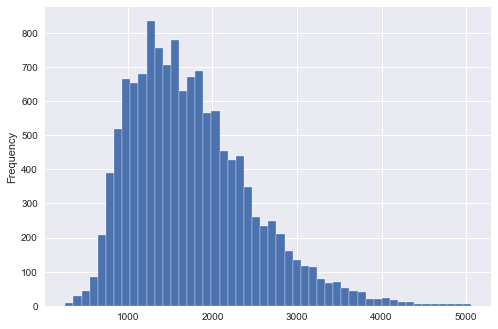

In [332]:
df['sqft_living'].plot(kind = 'hist', bins = 50)

In [333]:
print(df['sqft_lot'].sort_values(ascending = False))

17383    218331
27403    217852
12622    217800
22245    217800
27039    216493
          ...  
13100       919
23894       917
6810        900
21237       800
17155       648
Name: sqft_lot, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

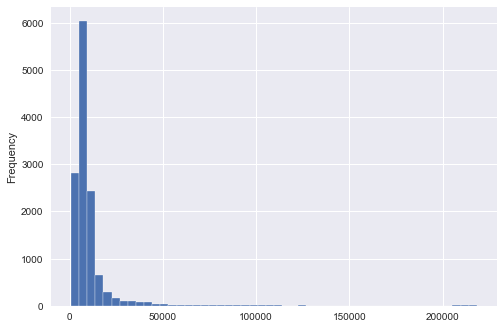

In [334]:
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [335]:
print(df['bedrooms'].sort_values(ascending = False))

9455     9
20184    9
11275    9
21623    9
18167    9
        ..
18147    0
2044     0
14636    0
23622    0
1310     0
Name: bedrooms, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

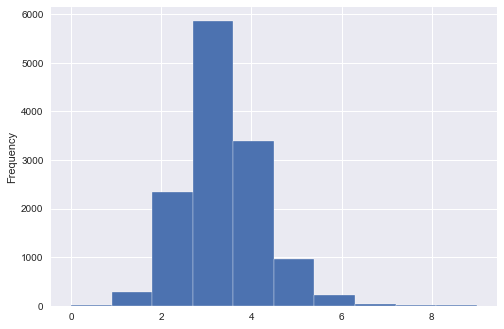

In [336]:
df['bedrooms'].plot(kind = 'hist', bins = 10)

In [337]:
print(df['bathrooms'].sort_values(ascending = False))

21623    7.5
657      7.5
25452    6.5
5089     6.5
6856     6.0
        ... 
26857    0.5
8468     0.0
29732    0.0
1952     0.0
1310     0.0
Name: bathrooms, Length: 13120, dtype: float64


<AxesSubplot:ylabel='Frequency'>

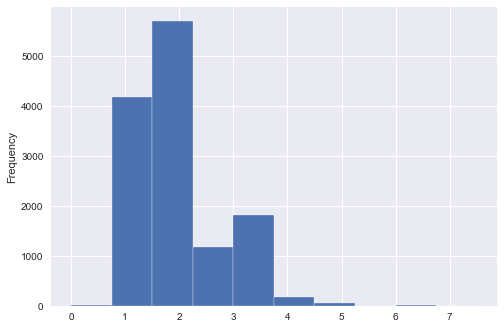

In [338]:
df['bathrooms'].plot(kind = 'hist', bins = 10)

In [339]:
print(df['condition'].sort_values(ascending = False))

18482    5
5996     5
10243    5
6021     5
6022     5
        ..
7961     1
7270     1
21522    1
1770     1
5286     1
Name: condition, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

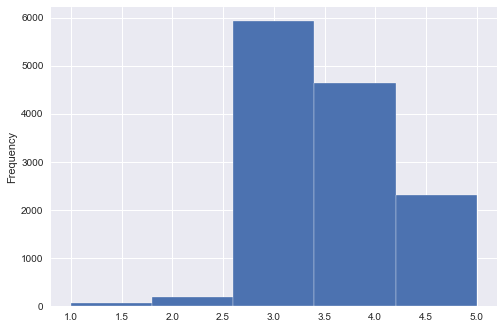

In [340]:
df['condition'].plot(kind = 'hist', bins = 5)

In [341]:
print(df['grade'].sort_values(ascending = False))

13290    12
21009    12
6903     12
19638    11
24297    11
         ..
9487      3
14636     3
27412     3
28397     3
3775      3
Name: grade, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

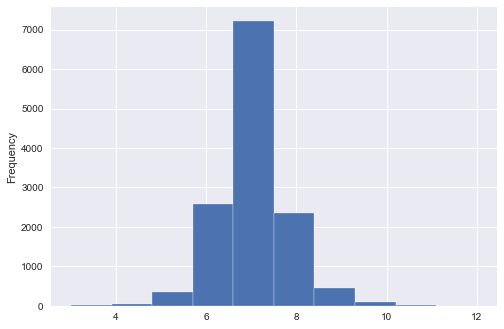

In [342]:
df['grade'].plot(kind = 'hist', bins = 10)

In [343]:
print(df['sqft_basement'].sort_values(ascending = False))

25748    2010
16320    2010
24722    2000
11795    2000
24994    1990
         ... 
16280       0
16283       0
16285       0
16288       0
0           0
Name: sqft_basement, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

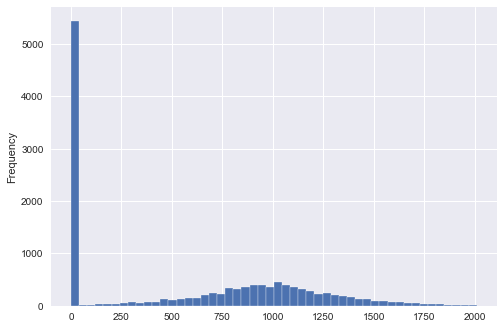

In [344]:
df['sqft_basement'].plot(kind = 'hist', bins = 50)

In [345]:
print(df['sqft_patio'].sort_values(ascending = False))

29993    1070
28847    1070
26225    1060
805      1060
12315    1060
         ... 
15095       0
15099       0
15102       0
15112       0
15103       0
Name: sqft_patio, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

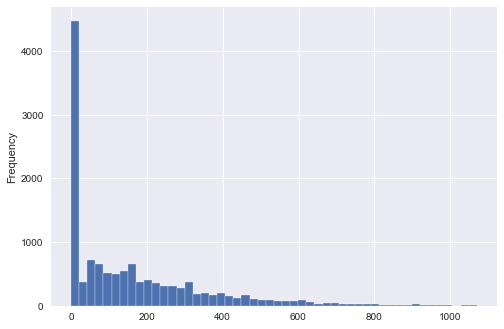

In [346]:
df['sqft_patio'].plot(kind = 'hist', bins = 50)

In [347]:
print(df['sqft_garage'].sort_values(ascending = False))

21758    1060
17435    1060
25452    1060
27248    1058
11173    1050
         ... 
17231       0
17230       0
17228       0
17227       0
0           0
Name: sqft_garage, Length: 13120, dtype: int64


<AxesSubplot:ylabel='Frequency'>

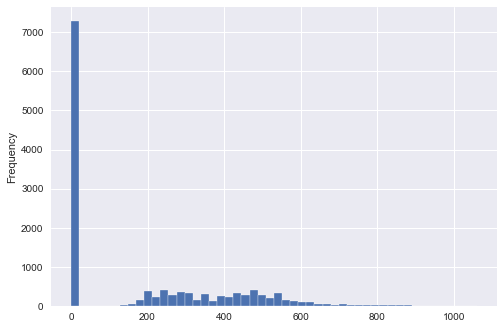

In [348]:
df['sqft_garage'].plot(kind = 'hist', bins = 50)

## Model Exploration

In [349]:

df = df.drop(['id', 'date', 'sqft_lot', 'sqft_above', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source', 'sewer_system', 'address', 'age', 'state', 'zip'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
0,675000.0,4,1.0,1180,4,7,0,0,40,0.250000
1,920000.0,5,2.5,2770,3,7,1570,0,240,0.500000
2,311000.0,6,2.0,2880,3,7,1580,0,0,0.333333
5,625000.0,2,1.0,1190,3,7,0,300,0,0.500000
6,1317227.0,3,3.0,2080,4,9,0,0,150,1.000000


In [350]:

df.corr()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
price,1.000000,0.287049,0.481746,0.563997,0.099640,0.575724,0.332058,0.097830,0.242300,0.275654
bedrooms,0.287049,1.000000,0.583978,0.647906,0.104669,0.398422,0.348954,0.177793,0.180983,-0.220685
bathrooms,0.481746,0.583978,1.000000,0.758446,0.186965,0.551041,0.422001,0.237988,0.301675,0.604038
sqft_living,0.563997,0.647906,0.758446,1.000000,0.113524,0.658216,0.569990,0.199055,0.355000,0.279586
condition,0.099640,0.104669,0.186965,0.113524,1.000000,0.070231,-0.010684,0.052900,0.090463,0.103514
grade,0.575724,0.398422,0.551041,0.658216,0.070231,1.000000,0.372837,0.289696,0.265875,0.241448
sqft_basement,0.332058,0.348954,0.422001,0.569990,-0.010684,0.372837,1.000000,0.102684,0.209398,0.178667
sqft_garage,0.097830,0.177793,0.237988,0.199055,0.052900,0.289696,0.102684,1.000000,0.109699,0.091241
sqft_patio,0.242300,0.180983,0.301675,0.355000,0.090463,0.265875,0.209398,0.109699,1.000000,0.181654
bath_to_bed,0.275654,-0.220685,0.604038,0.279586,0.103514,0.241448,0.178667,0.091241,0.181654,1.000000


<AxesSubplot:>

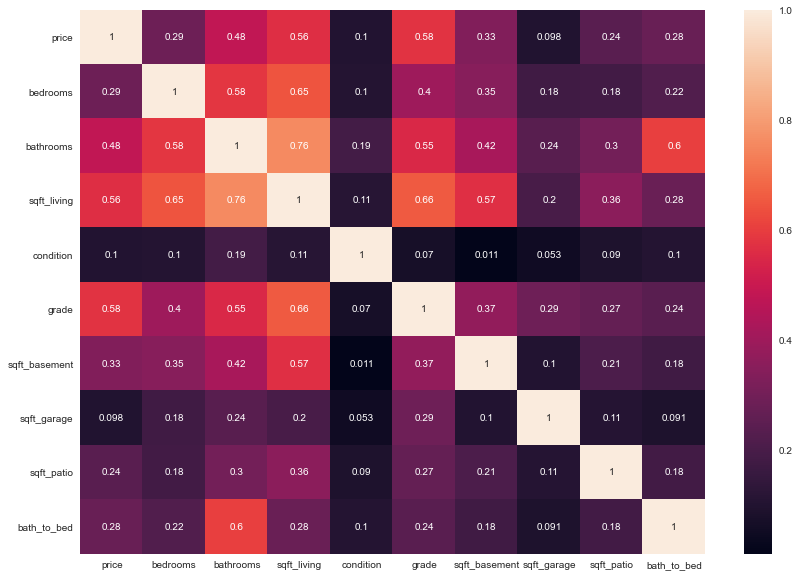

In [351]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)

In [352]:
formula = "price ~ sqft_living"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     6119.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:02:35   Log-Likelihood:            -1.8961e+05
No. Observations:               13120   AIC:                         3.792e+05
Df Residuals:                   13118   BIC:                         3.792e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.852e+05   1.06e+04     17.525      0.000    1.64e+05    2.06e+05
sqft_living   437.7126      5.596     78.225      0.000     426.745     448.681
==============================================================================
Omnibus:                     4633.513   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26460.121
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                       9.188   Cond. No.                     5.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [353]:
formula = "price ~ sqft_living + grade + sqft_patio"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     2830.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:02:35   Log-Likelihood:            -1.8885e+05
No. Observations:               13120   AIC:                         3.777e+05
Df Residuals:                   13116   BIC:                         3.777e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.099e+06   3.39e+04    -32.423      0.000   -1.17e+06   -1.03e+06
sqft_living   244.7874      7.240     33.812      0.000     230.597     258.978
grade        2.288e+05   5768.384     39.666      0.000    2.17e+05     2.4e+05
sqft_patio     99.7611     20.809      4.794      0.000      58.973     140.549
==============================================================================
Omnibus:                     5013.338   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34661.382
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                      10.225   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [354]:
dflog = df.copy()

In [355]:
# dflog['bathbed'] = dflog['bathrooms'] / dflog['bedrooms']
# median_bathbed = dflog['bathbed'].median()
# dflog.replace([np.inf, -np.inf], median_bathbed, inplace=True)
# dflog.fillna(median_bathbed, inplace=True)
# dflog['bathbed'].value_counts()

In [370]:
#list for cols to scale
cols_to_scale = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'bedrooms', 'bathrooms']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(dflog[cols_to_scale])

#scale selected data
dflog[cols_to_scale] = scaler.transform(dflog[cols_to_scale])
dflog


,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
0,675000.0,0.740698,-1.105416,-0.796694,4,7,-1.045964,-0.795827,-0.632953,0.250000
1,920000.0,1.733543,0.803216,1.431395,3,7,1.788445,-0.795827,0.398567,0.500000
2,311000.0,2.726387,0.167005,1.585539,3,7,1.806499,-0.795827,-0.839256,0.333333
5,625000.0,-1.244991,-1.105416,-0.782681,3,7,-1.045964,0.555954,-0.839256,0.500000
6,1317227.0,-0.252146,1.439427,0.464488,4,9,-1.045964,-0.795827,-0.065617,1.000000
...,...,...,...,...,...,...,...,...,...,...
30140,2650000.0,0.740698,2.075637,2.132051,4,9,0.867714,-0.795827,-0.632953,0.875000
30143,725000.0,-0.252146,-1.105416,-0.096037,3,7,0.542750,0.285598,-0.839256,0.333333
30146,380000.0,-0.252146,-1.105416,-1.245114,4,6,-1.045964,-0.795827,-0.839256,0.333333
30150,1555000.0,1.733543,0.167005,0.226265,4,8,0.994089,-0.795827,0.243839,0.400000


In [372]:
dflog['b2bscaled'] = dflog['bathrooms'] * dflog['bedrooms']
dflog

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed,b2bscaled
0,675000.0,0.740698,-1.105416,-0.796694,4,7,-1.045964,-0.795827,-0.632953,0.250000,-0.818780
1,920000.0,1.733543,0.803216,1.431395,3,7,1.788445,-0.795827,0.398567,0.500000,1.392409
2,311000.0,2.726387,0.167005,1.585539,3,7,1.806499,-0.795827,-0.839256,0.333333,0.455321
5,625000.0,-1.244991,-1.105416,-0.782681,3,7,-1.045964,0.555954,-0.839256,0.500000,1.376233
6,1317227.0,-0.252146,1.439427,0.464488,4,9,-1.045964,-0.795827,-0.065617,1.000000,-0.362946
...,...,...,...,...,...,...,...,...,...,...,...
30140,2650000.0,0.740698,2.075637,2.132051,4,9,0.867714,-0.795827,-0.632953,0.875000,1.537421
30143,725000.0,-0.252146,-1.105416,-0.096037,3,7,0.542750,0.285598,-0.839256,0.333333,0.278726
30146,380000.0,-0.252146,-1.105416,-1.245114,4,6,-1.045964,-0.795827,-0.839256,0.333333,0.278726
30150,1555000.0,1.733543,0.167005,0.226265,4,8,0.994089,-0.795827,0.243839,0.400000,0.289511


## Good

In [373]:
target = dflog['price']
predictors = dflog.drop(['price', 'bath_to_bed'], axis=1)
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1036.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:09:09   Log-Likelihood:            -1.8860e+05
No. Observations:               13120   AIC:                         3.772e+05
Df Residuals:                   13110   BIC:                         3.773e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.334e+05   4.59e+04    -18.151      0.000   -9.23e+05   -7.43e+05
bedrooms      -7.584e+04   5015.268    -15.122      0.000   -8.57e+04    -6.6e+04
bathrooms      5.448e+04   6081.213      8.959      0.000    4.26e+04    6.64e+04
sqft_living    1.719e+05   7486.482     22.956      0.000    1.57e+05    1.87e+05
condition      2.624e+04   4821.342      5.443      0.000    1.68e+04    3.57e+04
grade          2.386e+05   5875.121     40.608      0.000    2.27e+05     2.5e+05
sqft_basement  1.069e+04   4525.340      2.361      0.018    1815.098    1.96e+04
sqft_garage   -4.268e+04   3911.181    -10.912      0.000   -5.03e+04    -3.5e+04
sqft_patio     1.427e+04   3984.007      3.583      0.000    6463.649    2.21e+04
b2bscaled      2.306e+04   2928.253      7.874      0.000    1.73e+04    2.88e+04
==============================================================================
Omnibus:                     5273.461   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40418.878
Skew:                           1.741   Prob(JB):                         0.00
Kurtosis:                      10.862   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
lr = LinearRegression()
lr.fit(predictors, target)
lr.score(predictors, target)

0.4068546178597854

In [360]:
y_hat = lr.predict(predictors)
y_hat

array([ 670918.64730947, 1127694.58374807, 1023381.89908804, ...,
        446695.11465546, 1103521.93127242,  765774.82636322])

In [361]:
y_hat = lr.predict(predictors)
resid = (target - y_hat)

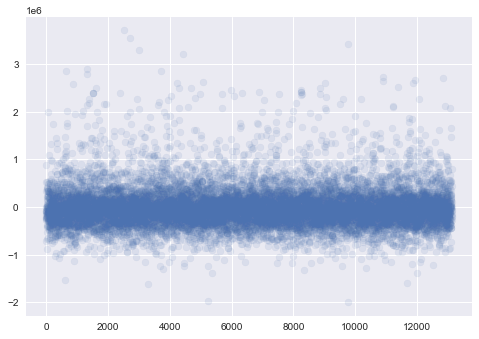

In [362]:
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

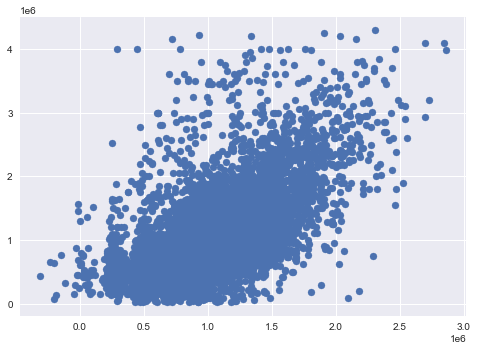

In [363]:
fig, ax = plt.subplots()

ax.scatter(y_hat, target)

In [364]:
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))

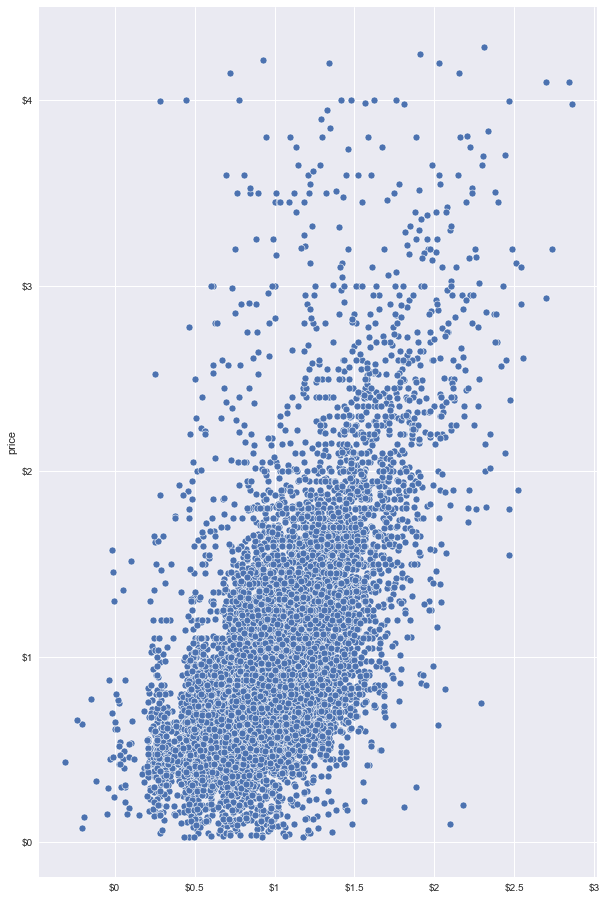

In [365]:
fig, ax = plt.subplots(figsize = (10,16))
sns.scatterplot(x = y_hat, y = target, ax=ax)
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)

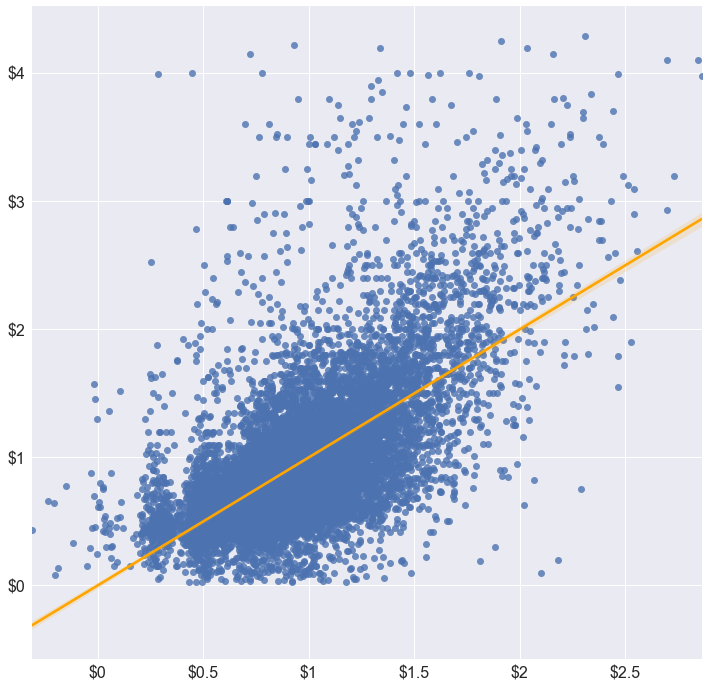

In [366]:
fig, ax = plt.subplots(figsize = (12,12))
sns.regplot(x = y_hat, y = target, line_kws={"color": "orange"})
ax.set(ylabel=None)
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
sns.set_style(style='white')

In [367]:
predictors.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade',
       'sqft_basement', 'sqft_patio', 'bath_to_bed'],
      dtype='object')

sqft_living 1.573e+05, std = 713.6434149039003

condition 2.132e+04, std = 0.7895859397473242

grade 2.229e+05, std = 0.8685869710286127

sqft_basement 9491.5537, std = 553.9285173565767

sqft_patio 1.32e+04, std= 193.89617631732378

bath_to_bed 2.607e+05, std = 0.21532773323288892

In [368]:
print(df['sqft_living'].std())
print(df['condition'].std())
print(df['grade'].std())
print(df['sqft_basement'].std())
print(df['sqft_patio'].std())
print(df['bath_to_bed'].std())

713.6434149039003
0.7895859397473242
0.8685869710286127
553.9285173565767
193.89617631732378
0.21532773323288892


Add 400 sqft room = increase value by $90,000

Raise condition by 1 = $21,000

Raise grade by 1 = increase value by $210,000

Basement extensions = 15$ per sqft

Add medium patio of 168 sqft = $12,000

Add bathroom to a 3bed = $48,000

https://www.landscapingnetwork.com/patios/size.html

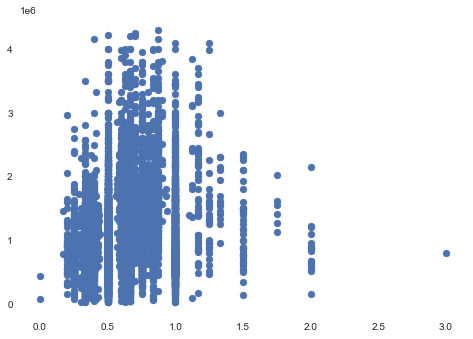

In [369]:
fig, ax = plt.subplots()

ax.scatter(df['bath_to_bed'], df['price'])

In [374]:
df['bedrooms'].mean()

3.2539634146341463

### Formula for Adding a Bathroom

In [377]:
a = 54480 # the coefficient of bathrooms_scaled
b = -75840 # the coefficient of bedrooms_scaled
c = 23060 # the coefficient of bathrooms_scaled*bedrooms_scaled
# d = number of bedrooms
# e = mean number of bedrooms in the dataset

In [378]:
d = 3
e = 3.25
a + c * (d - e)

48715.0